In [ ]:
from google.colab import files

uploaded = files.upload()

Saving ENB2012_data.xlsx to ENB2012_data.xlsx


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import preprocessing

# Loading The Data

In [ ]:
# Reading the data
df = pd.read_excel('ENB2012_data.xlsx')
display(df)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


# Cehcking for Missing Values

In [ ]:
for col in df.columns.values:
    
    # Getting list of unique values in each column
    unique_list = pd.unique(df[col])

    print("Datatype of {} is: ".format(col), df[col].dtype)
    print("Number of unique values for {} are: ".format(col), len(unique_list))

    # Converting a column to a boolean array checking for null values
    is_null = pd.isnull(df[col])

    # Calculating total null values
    total_null = np.sum(is_null)

    print("Number of missing entries for {} are: ".format(col), total_null)
    print("Number of non-missing entries for {} are: ".format(col), df[col].shape[0] - total_null)

    print("---------------")

Datatype of X1 is:  float64
Number of unique values for X1 are:  12
Number of missing entries for X1 are:  0
Number of non-missing entries for X1 are:  768
---------------
Datatype of X2 is:  float64
Number of unique values for X2 are:  12
Number of missing entries for X2 are:  0
Number of non-missing entries for X2 are:  768
---------------
Datatype of X3 is:  float64
Number of unique values for X3 are:  7
Number of missing entries for X3 are:  0
Number of non-missing entries for X3 are:  768
---------------
Datatype of X4 is:  float64
Number of unique values for X4 are:  4
Number of missing entries for X4 are:  0
Number of non-missing entries for X4 are:  768
---------------
Datatype of X5 is:  float64
Number of unique values for X5 are:  2
Number of missing entries for X5 are:  0
Number of non-missing entries for X5 are:  768
---------------
Datatype of X6 is:  int64
Number of unique values for X6 are:  4
Number of missing entries for X6 are:  0
Number of non-missing entries for X6 

# Correlation Matrix

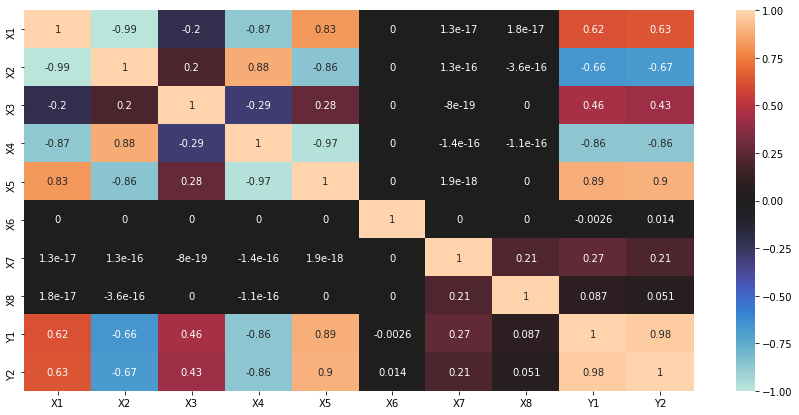

In [ ]:
plt.figure(figsize = (15, 7))

# Calculating correlation between all columns
var_corr = df.corr()

# Plotting correlation heatmap
sns.heatmap(var_corr, xticklabels = var_corr.columns, yticklabels = var_corr.columns, annot = True, vmin=-1, vmax=1, center= 0) 

# Preparing The Data (Pre-Processing)

In [ ]:
# Extracting the label column
Y1 = df['Y1']
Y2 = df['Y2']

# Dropping the label column from the main dataset
df = df.drop(['Y1', 'Y2'], axis = 1)
display(df)

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [ ]:
# Converting the data into numpy arrays
X = np.array(df)
Y1 = np.array(Y1)
Y2 = np.array(Y2)

# Reshaping the label array
Y1 = np.reshape(Y1, (Y1.shape[0], 1))
Y2 = np.reshape(Y2, (Y2.shape[0], 1))

print(X.shape)
print(Y1.shape)
print(Y2.shape)

(768, 8)
(768, 1)
(768, 1)


# Train-Test Split Function

In [ ]:
# Splitting the data into train and test sets
def data_split(test_split = 0.2):
    
    X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test = train_test_split(X, Y1, Y2, test_size = test_split, shuffle = True)
    return X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test

# Ridge Regression Function

In [ ]:
# Function to carry out ridge regression with regularization parameter alpha
def ridge_reg(X, Y, alpha):
    
    # Adding a column of ones to account for the constant
    bias_vector = np.ones((X.shape[0], 1))
    X_new = np.concatenate((bias_vector, X), axis = 1)
    
    # Creating an identity matrix with same dimensions as X_new
    I = np.identity(X_new.shape[1])
    I[0][0] = 0

    # Computing betas using the formula for ridge regression
    beta = np.linalg.multi_dot((np.linalg.inv(np.dot(np.transpose(X_new), X_new) + alpha*I), np.transpose(X_new), Y))
    return beta

# LASSO Regression Function

In [ ]:
# Function to carry out lasso regression with regularization parameter alpha
def lasso_reg(X, Y, alpha):

    # Creating an instance of LASSO optimiser
    clf = Lasso(alpha=alpha)

    # Fitting the data to get the best line
    clf.fit(X, Y)
    
    coef = clf.coef_
    intercept = clf.intercept_

    coef = np.reshape(coef, (coef.shape[0], 1))
    intercept = np.reshape(intercept, (intercept.shape[0], 1))

    return coef, intercept

# Error Function

In [ ]:
# To calculate the squared error between predicted and actual values
def error(y_pred, y_actual):
    
    error_vector = y_actual - y_pred
    
    # Computing using the formula for MSE
    MSE = np.dot(np.transpose(error_vector), error_vector)*(1/float(len(error_vector)))
    return MSE

# Coefficient of Determination Function

In [ ]:
# To calculate the coefficient of determinaiton
def coef_det(y_pred, y_actual):

    # Creating an array with elements as average Y values
    y_mean = np.mean(y_actual)*np.ones((y_actual.shape[0], 1))
    
    # Deviation from mean explained by model
    model_exp = y_pred - y_mean
    SSM = np.dot(np.transpose(model_exp), model_exp)
    
    # Actual deviation from mean
    total_exp = y_actual - y_mean
    SST = np.dot(np.transpose(total_exp), total_exp)

    # Using formula for coefficient of determinaiton
    return SSM[0][0]/SST[0][0]

# Simple Linear Regression

In [ ]:
# Training a simple linear regression model with alpha = 0
X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test = data_split()

# Normalizing the different features in the data
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

beta1 = ridge_reg(X_train, Y1_train, alpha = 0)
beta2 = ridge_reg(X_train, Y2_train, alpha = 0)

print(f"Coefficients corresponding to different features for Y1 are: {beta1[1:]}")
print(f"Intercept corresponding to the trained model for Y1 is: {beta1[0]}")
print("-----------")
print(f"Coefficients corresponding to different features for Y2 are: {beta2[1:]}")
print(f"Intercept corresponding to the trained model for Y2 is: {beta2[0]}")

Coefficients corresponding to different features for Y1 are: [[ -7.46045188]
 [-13.04321449]
 [  5.07713845]
 [  4.91776295]
 [  7.04718315]
 [  0.02345198]
 [  2.70324061]
 [  0.3825284 ]]
Intercept corresponding to the trained model for Y1 is: [22.3781759]
-----------
Coefficients corresponding to different features for Y2 are: [[ -8.36547574]
 [-14.19936928]
 [  4.69656218]
 [  5.32408975]
 [  6.83413572]
 [  0.14915679]
 [  2.09728916]
 [  0.12784898]]
Intercept corresponding to the trained model for Y2 is: [24.59359935]


In [ ]:
# Adding a column of ones to account for the constant
bias_vector = np.ones((X_test.shape[0], 1))
X_test_new = np.concatenate((bias_vector, X_test), axis = 1)

# Using the calculated beta values to make predictions on the test dataset
Y1_test_pred = np.dot(X_test_new, beta1)
print(f"Predicted values for Y1 in the test dataset are: {Y1_test_pred}")

print("-----------")

Y2_test_pred = np.dot(X_test_new, beta2)
print(f"Predicted values for Y2 in the test dataset are: {Y2_test_pred}")

Predicted values for Y1 in the test dataset are: [[16.60995163]
 [18.60714741]
 [28.1095808 ]
 [15.82293978]
 [15.10542539]
 [13.7944631 ]
 [20.34768068]
 [26.58180151]
 [ 7.35409311]
 [26.84908944]
 [41.03967021]
 [16.58886428]
 [27.18613745]
 [16.84595866]
 [15.33053862]
 [12.58850568]
 [27.35339632]
 [28.87360799]
 [23.61187264]
 [ 7.33300576]
 [30.07712462]
 [29.79514825]
 [14.05942184]
 [12.86435822]
 [32.08261662]
 [15.62747851]
 [14.08283838]
 [20.12256745]
 [12.07501718]
 [24.52587754]
 [30.05603727]
 [26.04722566]
 [11.09227567]
 [32.12912943]
 [34.86682426]
 [24.40192982]
 [34.7748279 ]
 [15.55565185]
 [36.5459928 ]
 [14.83813746]
 [35.22505436]
 [16.80378396]
 [12.85579361]
 [29.3027471 ]
 [14.08050919]
 [11.38688637]
 [35.60336519]
 [26.82046672]
 [13.3208201 ]
 [24.64813039]
 [18.8197379 ]
 [10.86716244]
 [40.75129493]
 [16.3028182 ]
 [15.58297462]
 [19.5879916 ]
 [29.92817039]
 [24.38084247]
 [13.04729676]
 [13.8366378 ]
 [41.28587078]
 [14.1289193 ]
 [16.05661762]
 [10.5

In [ ]:
# Calculating MSE Loss for the test dataset
loss1 = error(Y1_test_pred, Y1_test)
print(f"The MSE Loss for Y1 for the simple linear regression model is: {loss1[0][0]}")

loss2 = error(Y2_test_pred, Y2_test)
print(f"The MSE Loss for Y2 for the simple linear regression model is: {loss2[0][0]}")

# Calculating coefficient of determination for the test dataset
r1_squared = coef_det(Y1_test_pred, Y1_test)
print(f"The coefficient of determination for Y1 for the simple linear regression model is: {r1_squared}")

r2_squared = coef_det(Y2_test_pred, Y2_test)
print(f"The coefficient of determination for Y2 for the simple linear regression model is: {r2_squared}")

The MSE Loss for Y1 for the simple linear regression model is: 9.741488381602473
The MSE Loss for Y2 for the simple linear regression model is: 11.377094697338128
The coefficient of determination for Y1 for the simple linear regression model is: 0.8429269090241162
The coefficient of determination for Y2 for the simple linear regression model is: 0.7895064005990257


# Simple Linear Regression With Varying Test Splits

In [ ]:
test_splits = [0.4, 0.3, 0.1]

for test_split in test_splits:
    
    X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test = data_split()
    
    # Normalizing the different features in the data
    X_train = preprocessing.scale(X_train)
    X_test = preprocessing.scale(X_test)

    # Fitting the data to the simple linear regression model with 0 regularization
    beta1 = ridge_reg(X_train, Y1_train, alpha = 0)
    beta2 = ridge_reg(X_train, Y2_train, alpha = 0)

    print(f"Coefficients corresponding to different features for Y1 are: {beta1[1:]}")
    print(f"Intercept corresponding to the trained model for Y1 is: {beta1[0]}")
    print("-----------")
    print(f"Coefficients corresponding to different features for Y2 are: {beta2[1:]}")
    print(f"Intercept corresponding to the trained model for Y2 is: {beta2[0]}")


    # Adding a column of ones to account for the constant
    bias_vector = np.ones((X_test.shape[0], 1))
    X_test_new = np.concatenate((bias_vector, X_test), axis = 1)

    # Using the calculated beta values to make predictions on the test dataset
    Y1_test_pred = np.dot(X_test_new, beta1)
    print(f"Predicted values for Y1 in the test dataset are: {Y1_test_pred}")

    print("-----------")

    Y2_test_pred = np.dot(X_test_new, beta2)
    print(f"Predicted values for Y2 in the test dataset are: {Y2_test_pred}")

    # Calculating MSE Loss for the test dataset
    loss1 = error(Y1_test_pred, Y1_test)
    print(f"The MSE Loss for Y1 for the simple linear regression model is: {loss1[0][0]}")

    loss2 = error(Y2_test_pred, Y2_test)
    print(f"The MSE Loss for Y2 for the simple linear regression model is: {loss2[0][0]}")

    # Calculating coefficient of determination for the test dataset
    r1_squared = coef_det(Y1_test_pred, Y1_test)
    print(f"The coefficient of determination for Y1 for the simple linear regression model is: {r1_squared}")

    r2_squared = coef_det(Y2_test_pred, Y2_test)
    print(f"The coefficient of determination for Y2 for the simple linear regression model is: {r2_squared}")
    print("---------------------")

Coefficients corresponding to different features for Y1 are: [[-2.71960492]
 [-0.64234305]
 [ 1.36394603]
 [-2.96676049]
 [ 7.123702  ]
 [-0.02333043]
 [ 2.67850754]
 [ 0.37772526]]
Intercept corresponding to the trained model for Y1 is: [22.01255049]
-----------
Coefficients corresponding to different features for Y2 are: [[-3.46545984]
 [-0.67577522]
 [ 0.84632522]
 [-3.10314538]
 [ 7.48777678]
 [ 0.16914998]
 [ 1.97719325]
 [ 0.1576197 ]]
Intercept corresponding to the trained model for Y2 is: [24.31908795]
Predicted values for Y1 in the test dataset are: [[18.26343662]
 [27.36250936]
 [28.33183702]
 [33.93108787]
 [17.34705192]
 [27.86677172]
 [ 3.61033553]
 [ 8.21208155]
 [35.90999503]
 [31.8803961 ]
 [32.58862564]
 [24.3763078 ]
 [18.47276384]
 [28.05911469]
 [26.2970484 ]
 [25.13107968]
 [22.28829268]
 [13.35670009]
 [24.43555545]
 [17.38931532]
 [30.23237782]
 [10.82513083]
 [12.93167955]
 [ 6.86961932]
 [14.44014861]
 [16.61341173]
 [16.49406233]
 [30.56326671]
 [32.96082832]


# Ridge and LASSO Regression With Varying Regularization and Test Splits

In [ ]:
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

for test_split in test_splits:
    
    for alpha in alphas:

        print(f"Test split value: {test_split}")
        print(f"Alpha (regularization parameter) value: {alpha}")

        X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test = data_split(test_split = test_split)
        
        # Normalizing the different features in the data
        X_train = preprocessing.scale(X_train)
        X_test = preprocessing.scale(X_test)

        # Fitting the data to the ridge regression model
        beta1 = ridge_reg(X_train, Y1_train, alpha = alpha)
        beta2 = ridge_reg(X_train, Y2_train, alpha = alpha)

        # Adding a column of ones to account for the constant
        bias_vector = np.ones((X_test.shape[0], 1))
        X_test_new = np.concatenate((bias_vector, X_test), axis = 1)

        # Using the calculated beta values to make predictions on the test dataset
        Y1_test_pred = np.dot(X_test_new, beta1)
        Y2_test_pred = np.dot(X_test_new, beta2)
        
        # Calculating MSE Loss for the test dataset
        loss1 = error(Y1_test_pred, Y1_test)
        print(f"The MSE Loss for Y1 for the ridge regression model is: {loss1[0][0]}")

        loss2 = error(Y2_test_pred, Y2_test)
        print(f"The MSE Loss for Y2 for the ridge regression model is: {loss2[0][0]}")

        # Calculating coefficient of determination for the test dataset
        r1_squared = coef_det(Y1_test_pred, Y1_test)
        print(f"The coefficient of determination for Y1 for the ridge regression model is: {r1_squared}")

        r2_squared = coef_det(Y2_test_pred, Y2_test)
        print(f"The coefficient of determination for Y2 for the ridge regression model is: {r2_squared}")
        print("xxxxx")

        # Fitting the data to the LASSO regression model
        coef1, intercept1 = lasso_reg(X_train, Y1_train, alpha)
        coef2, intercept2 = lasso_reg(X_train, Y2_train, alpha)

        # Extracting the slope and intercept of the trained model
        intercept_vector1 = intercept1*np.ones((X_test.shape[0], 1))
        Y1_test_pred = np.dot(X_test, coef1) + intercept_vector1

        intercept_vector2 = intercept2*np.ones((X_test.shape[0], 1))
        Y2_test_pred = np.dot(X_test, coef2) + intercept_vector2

        # Calculating MSE Loss for the test dataset
        loss1 = error(Y1_test_pred, Y1_test)
        print(f"The MSE Loss for Y1 for the LASSO regression model is: {loss1[0][0]}")

        loss2 = error(Y2_test_pred, Y2_test)
        print(f"The MSE Loss for Y2 for the LASSO regression model is: {loss2[0][0]}")

        # Calculating coefficient of determination for the test dataset
        r1_squared = coef_det(Y1_test_pred, Y1_test)
        print(f"The coefficient of determination for Y1 for the LASSO regression model is: {r1_squared}")

        r2_squared = coef_det(Y2_test_pred, Y2_test)
        print(f"The coefficient of determination for Y2 for the LASSO regression model is: {r2_squared}")
        print("-----------------------")

Test split value: 0.4
Alpha (regularization parameter) value: 0.001
The MSE Loss for Y1 for the ridge regression model is: 8.394102847431823
The MSE Loss for Y2 for the ridge regression model is: 10.17322637509146
The coefficient of determination for Y1 for the ridge regression model is: 0.905313186396167
The coefficient of determination for Y2 for the ridge regression model is: 0.864228741371657
xxxxx
The MSE Loss for Y1 for the LASSO regression model is: 8.406590120802417
The MSE Loss for Y2 for the LASSO regression model is: 10.189301854139373
The coefficient of determination for Y1 for the LASSO regression model is: 0.9005477598565425
The coefficient of determination for Y2 for the LASSO regression model is: 0.8594523931601046
-----------------------
Test split value: 0.4
Alpha (regularization parameter) value: 0.005
The MSE Loss for Y1 for the ridge regression model is: 8.432932109277003
The MSE Loss for Y2 for the ridge regression model is: 10.926881489450304
The coefficient of d

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.420685437284192, tolerance: 4.026650074152173
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.882028905063635, tolerance: 4.807924784809565
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.4225922617843025, tolerance: 4.7163413752327745
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.58851864

# Result:
The best model on the basis of minimum MSE loss was obtained with a test split of 0.4, and a regularization parameter of 0.5 with the MSE loss for Y1 = 7.68 and Y2 = 9.76 (approximately)